In [127]:
import pandas as pd
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [102]:
evs = pd.read_csv("EV2.csv")

In [103]:
evs = evs.drop("Unnamed: 0", axis = 1)

In [4]:
risks = pd.read_csv("risk2.csv")

In [5]:
risks = risks.drop("Unnamed: 0", axis = 1)

In [6]:
monthdata = pd.read_csv("monthdata.csv")

In [7]:
monthdata = monthdata.drop("Date",axis =1 )

In [8]:
monthdata = monthdata[25:].pct_change()[1:]

In [9]:
monthdata = monthdata.reset_index().drop("index", axis = 1)

In [10]:
y = risks
for names in risks.columns:
    if(names not in evs.columns):
        y = y.drop(names, axis = 1)

In [11]:
risks = y

In [134]:
result1 = []
# model 1: max expreturn
def model1(num):
    expreturn = evs[num:num+1]
    expreturn = expreturn.to_numpy()[0]
    coeff = [[1]*476]
    highest_risk = 0.02
    lhs_ineq = coeff*risks.to_numpy()
    rhs_ineq = [highest_risk]
    lhs_eq = coeff
    rhs_eq = [1]
    bnd = [(0,0.05)] * 476
    opt1 = linprog(c = -expreturn, 
                   A_ub=lhs_ineq, b_ub=rhs_ineq, 
                   A_eq = lhs_eq, b_eq = rhs_eq, 
                   bounds = bnd, method = "revised simplex")
    ct = 0
    pctchange = 0
    print(opt1.x)
    for i in range(len(opt1.x)):
        if(opt1.x[i] != 0):
            na = evs.columns[i]
            pctchange += monthdata[na][num]
            ct += 1
    pctchange = pctchange/ct
    result1.append(pctchange)

In [135]:
for i in range(len(monthdata)):
    model1(i)

[0.00000000e+00 0.00000000e+00 1.56587242e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73472348e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00000000e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

[ 0.00000000e+00  0.00000000e+00 -8.67361738e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.93889390e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  0.00000000e+00  2.53318622e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.33680869e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  5.00000000e-02  0.00000000e+00 -4.33680869e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02168375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05       0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.     

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05       0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.01999536 0.         0.
 0.         0.         0.         0.         0.     

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.33680869e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.79086235e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[0.00000000e+00 0.00000000e+00 5.00000000e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.000000

[-6.93889390e-18  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 4.33680869e-19  6.93889390e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  8.67361738e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-02
 0.00000000e+00 0.00000000e+00 8.67361738e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.000000

[0.00000000e+00 0.00000000e+00 1.73472348e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-02
 0.00000000e+00 0.00000000e+00 8.67361738e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73472348e-18 0.00000000e+00
 5.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.000000

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.67361738e-19  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.67361738e-19  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05       0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05       0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05       0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.67361738e-19
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.70271246e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.00434520e-02  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[5.42101086e-20 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00000000e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-02
  0.00000000e+00 -6.93889390e-18  1.73472348e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.46944695e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.73472348e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.07957886e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 0.00000000e+00  3.46944695e-18  0.00000000e+00  5.00000000e-02
  0.00000000e+00  0.00000000e+00 -1.73472348e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.73472348e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.00000000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.97496514e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [133]:
result1

[0.01509930069584257,
 0.01464025444921406,
 0.03574350502028569,
 0.02294438132386131,
 0.023440062584680142,
 0.03751992377572467,
 0.010880170623684918,
 0.026860736911310773,
 0.03870523667620127,
 0.015575980247136873,
 0.060441625460158035,
 -0.03473892875628119,
 -0.01606416856639127,
 0.01067986594653956,
 -0.011096306499768359,
 0.03998253458613909,
 0.02856068984169856,
 0.06234002399850656,
 0.02156779197971911,
 -0.06869178064225107,
 0.02633070761399068,
 -0.07848985985337444,
 0.09072409439241859,
 -0.0004840875613162956,
 0.008943051287566683,
 0.004990205689660182,
 -0.034245254778689026,
 0.058940964224000976,
 0.011039583804735909,
 -0.014084484367129798,
 0.033099877804135,
 0.03940977279682705,
 0.044177191198208315,
 0.003450865088701107,
 0.004829498875466167,
 -0.014862180165373521,
 0.0013881333351151062,
 0.05522803116295743,
 0.008936871073782075,
 -0.01085170263697924,
 0.03678682632047255,
 -0.0025123367067697265,
 0.02900966662361807,
 0.006561304502694297]

In [107]:
result2 = []
# model 2
def model2(num):
    coeff = [[1]*476]
    required_return = 0.5
    obj = coeff*risks.to_numpy()
    expreturn = evs[num:num+1].to_numpy()[0]
    lhs_ineq = -expreturn*coeff
    rhs_ineq = [-required_return]
    lhs_eq = coeff
    rhs_eq = [1]
    bnd = [(0,0.05)] * 476
    opt1 = linprog(c = obj, 
                   A_ub=lhs_ineq, b_ub=rhs_ineq, 
                   A_eq = lhs_eq, b_eq = rhs_eq, 
                   bounds = bnd, method = "revised simplex")
    ct = 0
    pctchange = 0
    for i in range(len(opt1.x)):
        if(opt1.x[i] != 0):
            na = evs.columns[i]
            pctchange += monthdata[na][num]
            ct += 1
    pctchange = pctchange/ct
    result2.append(pctchange)

In [108]:
for i in range(len(monthdata)):
    model2(i)

In [109]:
result2

[0.03756347690482899,
 0.009896006677730895,
 0.006254750704943629,
 0.019877961852920074,
 0.04959830551168038,
 -0.005863639005730914,
 0.023753257801234783,
 0.007335106099699095,
 0.024414058883361643,
 0.028853122840317692,
 0.08004377529679517,
 -0.06965365260541699,
 -0.006536565708543646,
 0.1319891483420414,
 0.04096098544832731,
 0.003493406117065201,
 0.027842590963263757,
 0.031026259189768646,
 0.01738592912219279,
 -0.11746287845546965,
 0.025968299038228216,
 -0.10844128579504198,
 0.165115260141177,
 0.057314206939593194,
 0.004813427376350687,
 0.06638113479174948,
 -0.12745960278220067,
 0.13210233493979845,
 -0.027430004415185245,
 -0.07563947709131845,
 0.05422454796286648,
 0.043510489738213434,
 0.0656947773446131,
 0.07584202959796277,
 -0.06434063218478478,
 -0.09648248770763454,
 -0.29597386087978567,
 0.4702947422468101,
 -0.008536678262792512,
 0.04323779265014201,
 -0.013792353914630018,
 0.07039905120391496,
 -0.12034153416751676,
 0.002873800994520126]

In [21]:
# model 3
result3 = []

def returns(num):
    expreturn = evs[num:num+1]
    expreturn = expreturn.to_numpy()[0]
    expreturn = risks - expreturn #this is the objective function
    lhs_eq = [[1] *476] # number of rows # weight = 1
    rhs_eq = [1]
    bnd = [(0,.05)] * 476
    opt3 = linprog(c=expreturn, A_eq = lhs_eq, b_eq = rhs_eq, bounds = bnd, method = "revised simplex")
    ct = 0
    pctchange = 0
    for i in range(len(opt3.x)):
        if(opt3.x[i] != 0):
            na = evs.columns[i]
            pctchange += monthdata[na][num]
            ct += 1
    pctchange = pctchange/ct
    result3.append(pctchange)

In [22]:
for i in range(len(monthdata)):
    returns(i)

In [23]:
result3

[0.023874389132723117,
 0.0046954898740403485,
 0.021366776858905874,
 0.028877623922303634,
 0.03609536696526232,
 0.03642561877427929,
 0.007637780053264482,
 0.004067897973197366,
 0.03841088487530118,
 0.011224633053269184,
 0.07868077100401866,
 -0.032633681934309614,
 -0.024299470770754693,
 0.13416760439134506,
 0.005023983907553142,
 0.04046827763406817,
 0.022257675952027184,
 0.06725074089834596,
 0.024285622049494148,
 -0.07076760590396995,
 0.013554444253655373,
 -0.08894148099653923,
 0.11061152369719698,
 0.01921112676504915,
 0.011426242695735117,
 0.011117911663731567,
 -0.055640536085831103,
 0.09940679529774167,
 0.015498685823163416,
 -0.03837854425033657,
 0.025142652316714142,
 0.04427023802884434,
 0.06266656201139066,
 0.02409579286195801,
 0.00740028024248462,
 -0.06463424465380269,
 -0.04388578709716687,
 0.09974121180309944,
 -0.022794746684388422,
 0.024599387413918393,
 0.011953431017026162,
 0.018300177080903264,
 -0.055907515534142395,
 0.00760257245820123

In [64]:
statistics.mean(result3)

0.015761967246340252

In [69]:
sp500 = pd.read_csv("sp500monthly.csv")
sp500 = sp500[25:]
sp500 = sp500.drop("2015-01-01", axis = 1)
sp500 = sp500["1994.989990234375"].reset_index().drop("index", axis = 1)["1994.989990234375"].pct_change()[1:]

In [70]:
statistics.mean(sp500)

0.009888790421872578

In [71]:
statistics.stdev(result3)

0.047499923025095446

In [72]:
statistics.stdev(sp500)

0.046419642847049164

In [94]:
def graph(result):  
    cumreturns = [1]
    cumsp = [1]

    for i in range(1, len(result)):
        nxt = cumreturns[i-1]*(1+result[i])
        cumreturns.append(nxt)

    for i in range(1, len(result)):
        nxt = cumsp[i-1]*(1+sp500[i])
        cumsp.append(nxt)
    return cumreturns, cumsp

In [77]:
a = statistics.mean(result3)

In [78]:
b = statistics.stdev(result3)

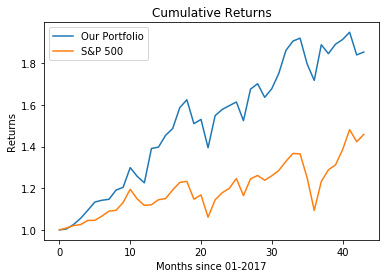

In [136]:
plt.plot(graph(result3)[0], label = "Our Portfolio")
plt.plot(graph(result3)[1], label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Cumulative Returns")
plt.legend()

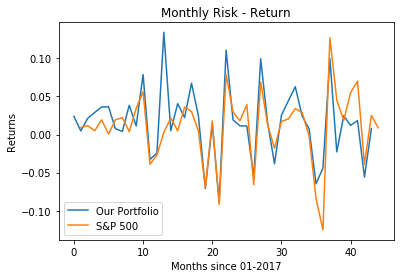

In [122]:
plt.plot(result3, label = "Our Portfolio")
plt.plot(sp500, label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Monthly Risk - Return")
plt.legend()

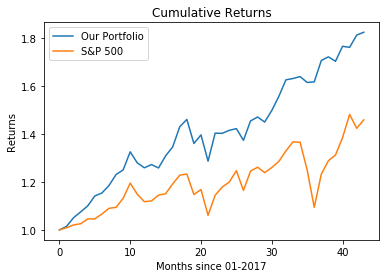

In [110]:
# model 1
plt.plot(graph(result1)[0], label = "Our Portfolio")
plt.plot(graph(result1)[1], label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Cumulative Returns")
plt.legend()

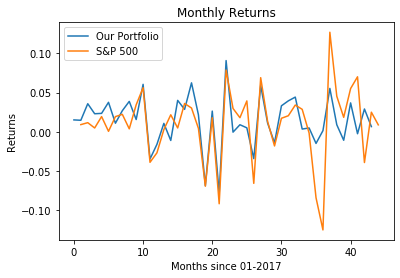

In [111]:
plt.plot(result1, label = "Our Portfolio")
plt.plot(sp500, label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Monthly Returns")
plt.legend()

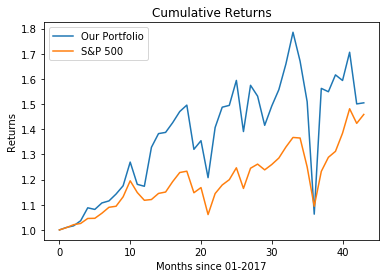

In [138]:
# model 2
plt.plot(graph(result2)[0], label = "Our Portfolio")
plt.plot(graph(result2)[1], label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Cumulative Returns")
plt.legend()

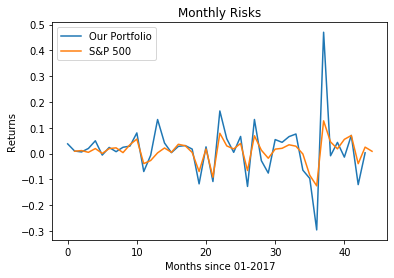

In [126]:
plt.plot(result2, label = "Our Portfolio")
plt.plot(sp500, label = "S&P 500")
plt.xlabel("Months since 01-2017")
plt.ylabel("Returns")
plt.title("Monthly Risks")
plt.legend()